In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("C:/mba/sip DA/a.csv")

In [3]:
df.shape

(1000, 9)

In [4]:
df.head()

,Name,age,gender,education,income,country,purchase_frequency,spending,Unnamed: 8
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,11,13227.120,NaN
1,Christine Myers,49,Female,Master,82468,Aruba,7,12674.040,NaN
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,4,5354.115,NaN
3,Amy Norton,24,Female,Bachelor,60651,Palau,2,2606.510,NaN
4,Tonya Adams,64,Male,Master,81884,Zambia,11,18984.780,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   int64  
 7   spending            1000 non-null   float64
 8   Unnamed: 8          0 non-null      float64
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [6]:
df.describe()

,age,income,purchase_frequency,spending,Unnamed: 8
count,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,41.754000,59277.852000,6.647000,9613.296835,NaN
std,13.778582,23258.377128,3.483465,5484.707210,NaN
min,18.000000,20031.000000,1.000000,611.985000,NaN
25%,30.000000,38825.500000,4.000000,5020.425000,NaN
50%,42.000000,58972.000000,7.000000,9430.395000,NaN
75%,54.000000,79114.000000,10.000000,13645.507500,NaN
max,65.000000,99780.000000,12.000000,25546.500000,NaN


In [7]:
pd.isnull(df).sum()

Name                     0
age                      0
gender                   0
education                0
income                   0
country                  0
purchase_frequency       0
spending                 0
Unnamed: 8            1000
dtype: int64

In [8]:
df=df.drop('Unnamed: 8',axis = 1 )

In [9]:
df.columns

Index(['Name', 'age', 'gender', 'education', 'income', 'country',
       'purchase_frequency', 'spending'],
      dtype='object')

In [26]:
for i in df.columns:
    print (i , ":", df[i].unique())
    print ("_"*100)
    print (" _ "*40)

Name : ['Teresa Williams MD' 'Christine Myers' 'Dwayne Moreno' 'Amy Norton'
 'Tonya Adams' 'Charles Smith' 'Misty Moody' 'Brian Kent' 'Stacie Ray'
 'Brian Townsend' 'Samantha Bailey' 'Christopher Wright' 'John Harrington'
 'Gregory Franklin' 'Jordan Garrett' 'Barbara Fuller' 'Eric Rogers'
 'Christopher Fleming' 'Sandra Wheeler' 'Elizabeth Guzman' 'Kathleen Mata'
 'Jack Perry' 'Tyler Silva' 'Joy Carter' 'Jody Collins' 'Elizabeth Brown'
 'Mrs. Brandy Tate' 'Janet Miller' 'Mary Smith' 'Denise Martin'
 'Michael Brown' 'Craig Thomas' 'Ashley Cain' 'Carolyn Wilson'
 'Allison Chen' 'Crystal Jacobson' 'Rhonda Gordon' 'Jenna Cowan'
 'Taylor Yang' 'Judy Moses' 'Eric Farmer' 'Meghan Hansen' 'Susan Jones'
 'Mr. Anthony Powell Jr.' 'Tony Hayes' 'Brianna Price MD' 'Kelly Guerrero'
 'Kendra Cook' 'Anthony Simpson' 'Nicole Simpson' 'Sydney Smith'
 'Heather Wright' 'Margaret Taylor' 'Charles Mitchell' 'David Harris'
 'Kim Perry' 'Ashley Chambers' 'Linda Saunders' 'Amber Jensen'
 'Joseph Mitchell' 'Brit

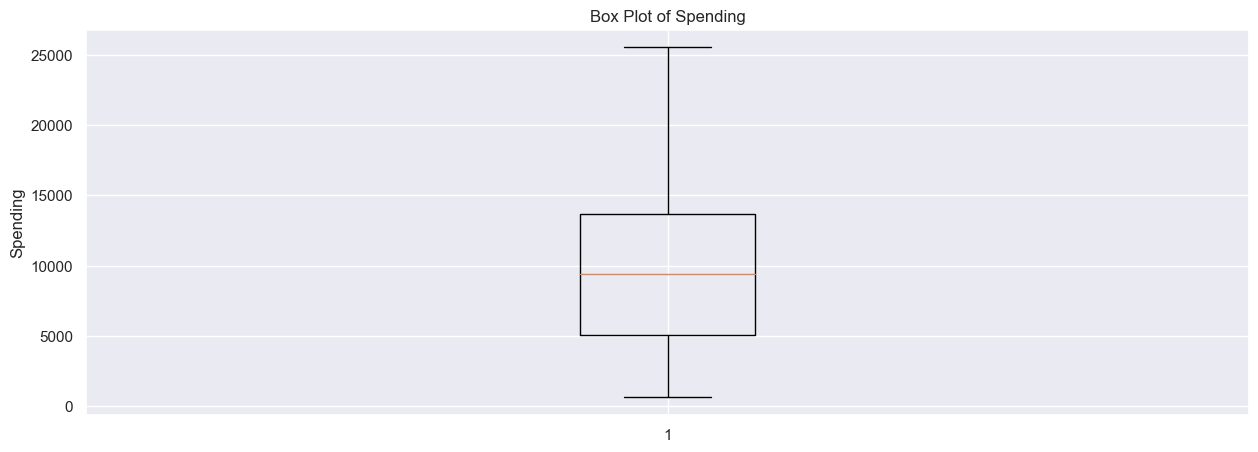

In [24]:
plt.boxplot(df['spending'])
plt.title("Box Plot of Spending")
plt.ylabel("Spending")


plt.show()

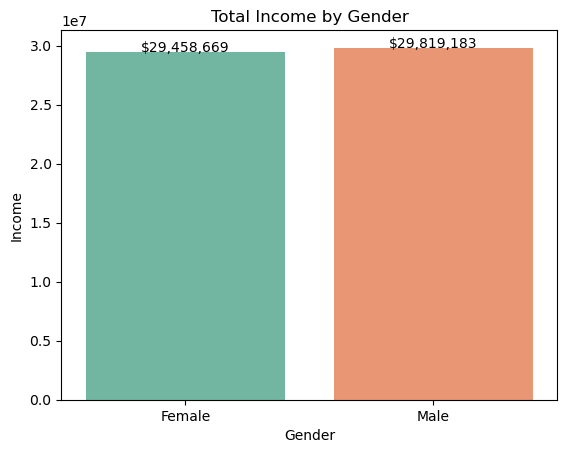

In [10]:
# ax = sns.countplot(data=df, x= "age",hue="gender")
# Group the data and calculate the sum of 'income' by 'gender'
grouped_data = df.groupby('gender', as_index=False)['income'].sum().sort_values(by='income', ascending=True)

# Create the bar plot using seaborn
sns.barplot(x='gender', y='income', data=grouped_data, palette='Set2')

# Add labels to the bars
for index, row in grouped_data.iterrows():
    plt.text(row.name, row.income, f"${row.income:,.0f}", color='black', ha="center")

# Set labels and title
plt.xlabel("Gender")
plt.ylabel("Income")
plt.title("Total Income by Gender")

# Display the plot
plt.show()


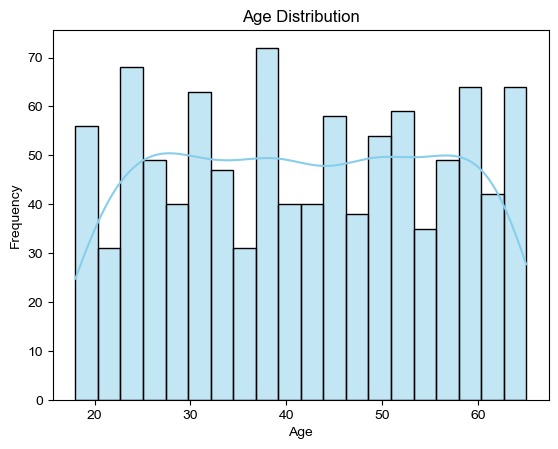

In [11]:
# # Histogram of age distribution
# sns.histplot(data=df, x="age", bins=10, kde=True)
# plt.title("Age Distribution")
# plt.xlabel("Age")
# plt.ylabel("Frequency")
# plt.show()


# Histogram of age distribution
sns.histplot(data=df, x="age", bins=20, kde=True, color='skyblue')
sns.set(rc= {'figure.figsize':(15,5)})
# Set labels and title
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Display the plot
plt.show()

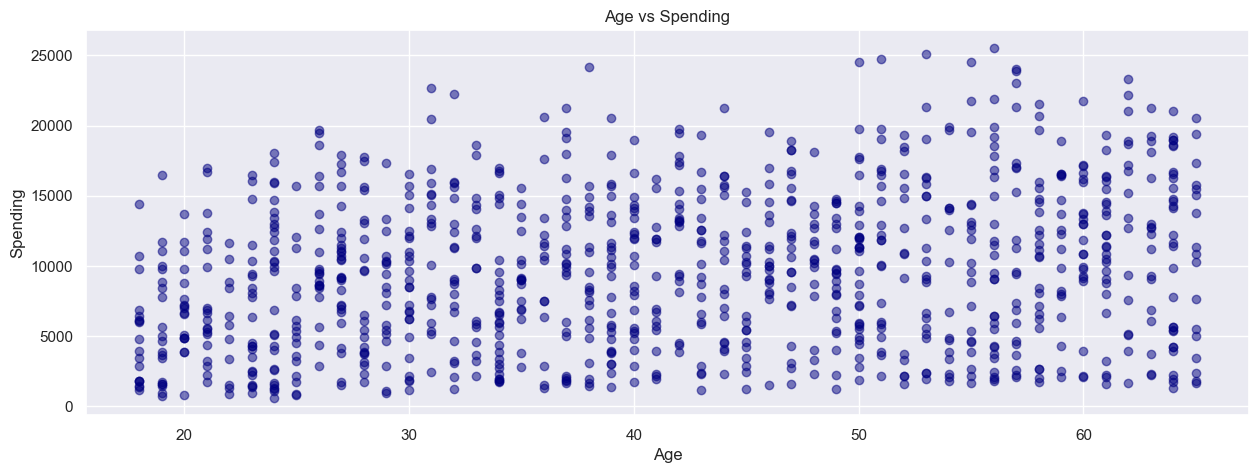

Correlation between age and spending: 0.2342007352501969


In [13]:
# Assuming 'df' is the DataFrame containing the data
correlation = df['age'].corr(df['spending'])

# Scatter plot of age vs spending
plt.scatter(df['age'], df['spending'], alpha=0.5, color='navy')
sns.set(rc= {'figure.figsize':(15,5)})

# Set labels and title
plt.title("Age vs Spending")
plt.xlabel("Age")
plt.ylabel("Spending")

# Display the plot
plt.show()

print("Correlation between age and spending:", correlation)

In [16]:
correlation = df['income'].corr(df['purchase_frequency'])

print("Correlation between income and purchase frequency:", correlation)

Correlation between income and purchase frequency: 0.02625245285610275


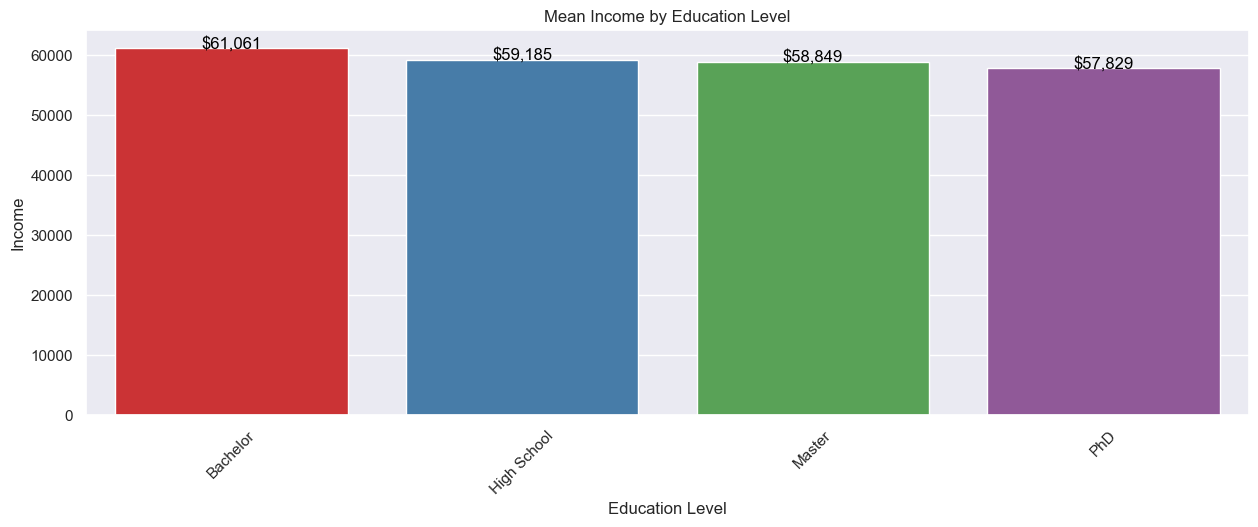

In [14]:
# Calculate the mean income by education level
grouped_data = df.groupby('education')['income'].mean().sort_values(ascending=False)

# Create the bar plot
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette='Set1')

# Set labels and title
plt.title("Mean Income by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Income")

for index, value in enumerate(grouped_data.values):
    plt.annotate(f"${value:,.0f}", (index, value), ha="center", color='black')
    
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

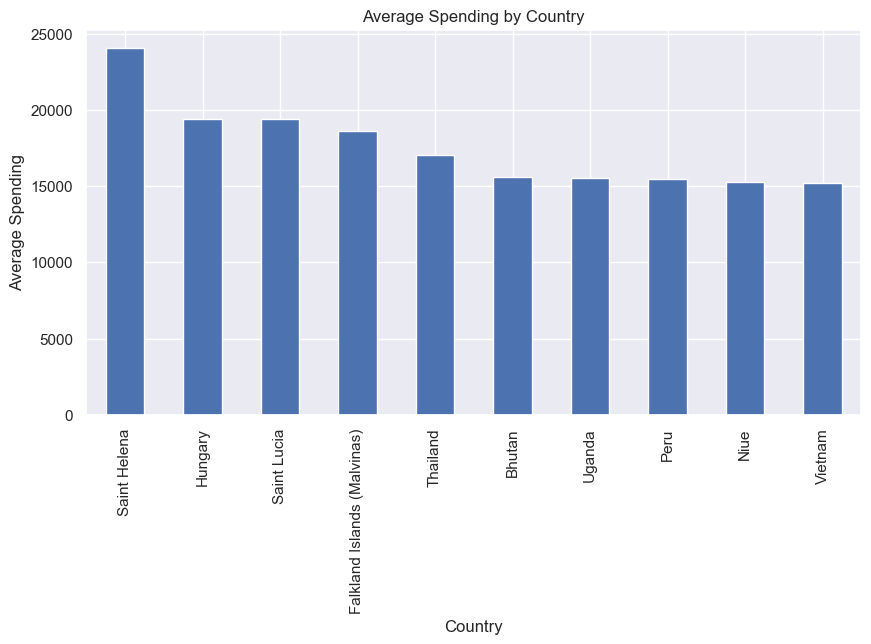

In [17]:
grouped_data = df.groupby('country')['spending'].mean().sort_values(ascending=False).head(10)
#.head will give us top values 
sns.set(rc= {'figure.figsize':(10,5)})
#this above is for size of the plot
# Plotting the mean spending by country
grouped_data.plot(kind='bar')
plt.title("Average Spending by Country")
plt.xlabel("Country")
plt.ylabel("Average Spending")
plt.show()

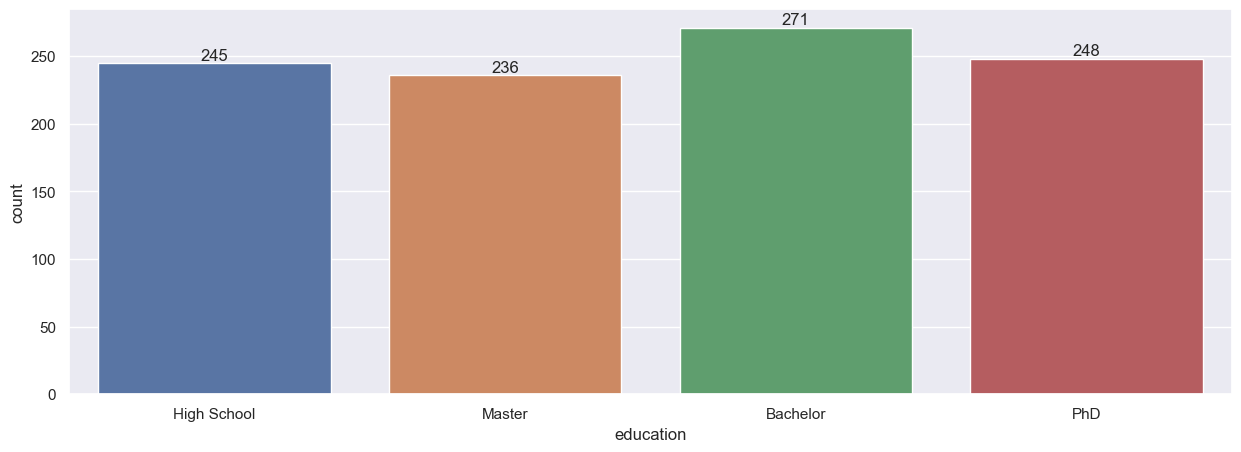

In [19]:
sns.set(rc= {'figure.figsize':(15,5)})
ax = sns.countplot(data=df, x= "education")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='education', ylabel='spending'>

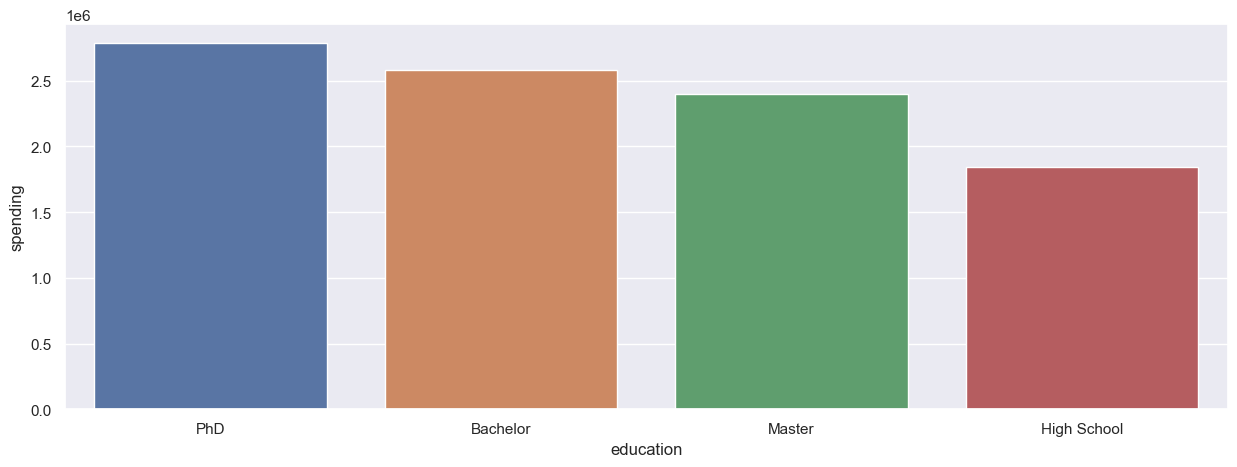

In [20]:
sales_state = df.groupby(['education'], as_index=False)['spending'].sum().sort_values(by='spending', ascending = False)
sns.set(rc= {'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x= 'education',y= 'spending')

In [27]:
male_frequency = df[df['gender'] == 'Male']['purchase_frequency']
female_frequency = df[df['gender'] == 'Female']['purchase_frequency']

# Perform t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(male_frequency, female_frequency)

alpha = 0.05  # Set the significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in purchase_frequency between males and females.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in purchase_frequency between males and females.")

Fail to reject the null hypothesis.
There is no significant difference in purchase_frequency between males and females.


In [21]:
from scipy.stats import f_oneway

# Group the data by education level and extract the income for each group
education_levels = df['education'].unique()
education_groups = [df[df['education'] == level]['income'] for level in education_levels]

# Perform ANOVA
f_stat, p_value = f_oneway(*education_groups)

# Set the significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in income based on education level.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in income based on education level.")



Fail to reject the null hypothesis.
There is no significant difference in income based on education level.


In [22]:
# Create a contingency table of 'gender' and 'education'
contingency_table = pd.crosstab(df['gender'], df['education'])

# Perform the chi-square test of association
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant association between gender and education.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant association between gender and education.")

Fail to reject the null hypothesis.
There is no significant association between gender and education.
